In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import math
import random

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn import metrics

import gc; gc.enable()

import warnings
warnings.filterwarnings("ignore")

In [169]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


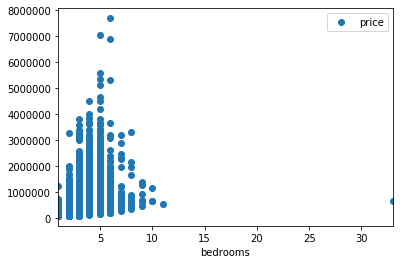

In [4]:
df.plot(x='bedrooms', y='price', style='o')

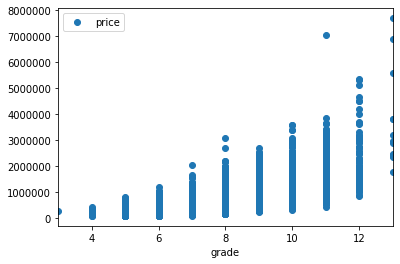

In [5]:
df.plot(x='grade', y='price', style='o')

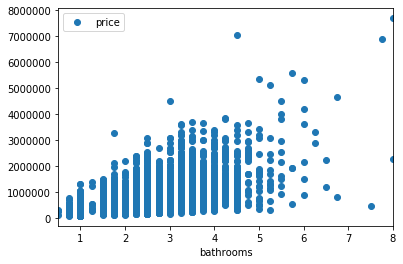

In [6]:
df.plot(x='bathrooms', y='price', style='o')

In [7]:
# df['id'].value_counts()

In [8]:
# df.loc[df['id']==795000620]

In [9]:
# df['bedrooms'].value_counts()

In [10]:
# df.loc[df['bedrooms']==33]

In [170]:
df['bedrooms'].replace(to_replace = 33, value =3 , inplace=True)

In [12]:
# df.loc[df['id']==2402100895]

In [13]:
# df['bathrooms'].value_counts()

In [171]:
pd.options.display.max_columns=100

In [15]:
# df.sort_values(by=['yr_built'],ascending=False)
# df['yr_built'].value_counts()
# df.loc[df['yr_built']==1900]

In [16]:
# df_test = df.duplicated(subset=None, keep='first')

In [17]:
# df_test.value_counts()

In [18]:
# df.isna().sum()

In [19]:
# df['waterfront'].unique()

In [20]:
# df['waterfront'].value_counts()

In [172]:
df['waterfront'].fillna(value=0,inplace=True)

In [22]:
# df['waterfront'].value_counts()

In [173]:
df['yr_renovated'].fillna(value=0,inplace=True)

In [24]:
# df.isna().sum()

In [174]:
df.dropna(subset=['view'],inplace=True)

In [26]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [175]:
df['sqft_basement'].replace(to_replace = '?', value = df['sqft_living'] - df['sqft_above'], inplace=True)

In [28]:
# df['sqft_basement'].unique()

In [176]:
df['sqft_basement'] = df['sqft_basement'].astype("float32")

In [177]:
df1 = df.drop(columns=['date'])

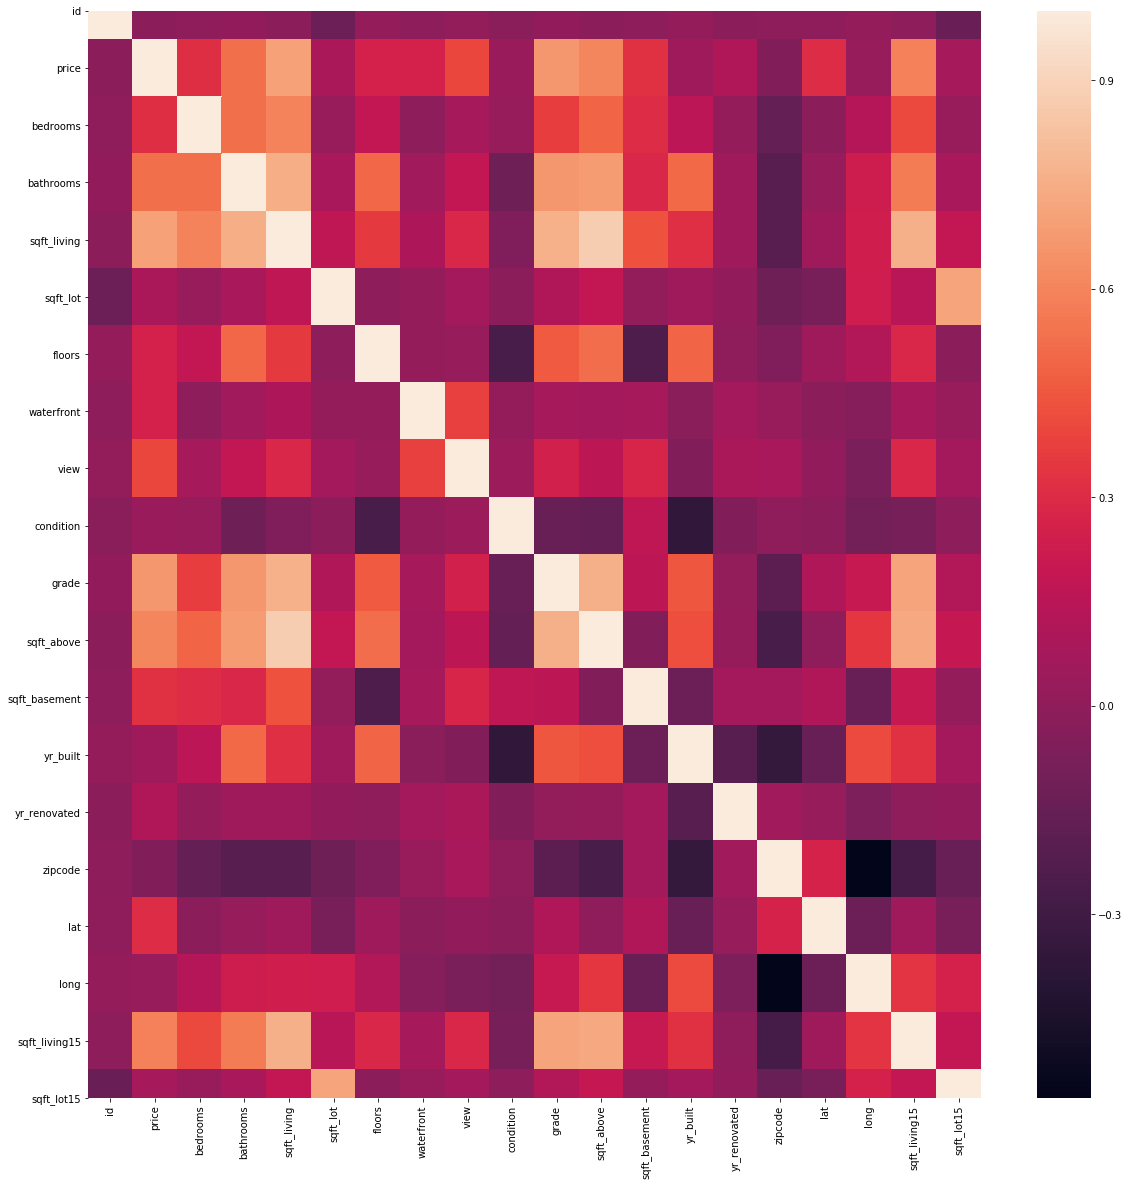

In [178]:
plt.figure(figsize = (20,20))
sns.heatmap(df1.corr())

In [179]:
target = "price"
used_cols = [c for c in df1.columns.to_list() if c not in [target]]

X = df1[used_cols]
y = df1[target]

In [180]:
df.corr()[target].abs().sort_values(ascending=False)

price            1.000000
sqft_living      0.701587
grade            0.668307
sqft_above       0.605695
sqft_living15    0.585304
bathrooms        0.525053
view             0.395734
sqft_basement    0.321816
bedrooms         0.315229
lat              0.307868
waterfront       0.259220
floors           0.257052
yr_renovated     0.117982
sqft_lot         0.090338
sqft_lot15       0.083189
yr_built         0.054273
zipcode          0.053620
condition        0.035393
long             0.022417
id               0.017392
Name: price, dtype: float64

In [34]:
# result = pd.DataFrame({'Model': [],
#                         'Details':[],
#                         'Root Mean Squared Error (RMSE)':[],
#                         'R-squared (train)':[],
#                         'R-squared (test)':[],
#                         '3-Fold Cross Validation':[]})

In [181]:
scaler = RobustScaler()
lr = LinearRegression()
pipe1 = make_pipeline(scaler, lr)

metrics = ['r2', 'neg_mean_squared_error']
    
cv = cross_validate(pipe1, X, y, cv=3, n_jobs=-1, scoring=metrics,return_train_score=True)

In [182]:
sorted(cv.keys())

['fit_time',
 'score_time',
 'test_neg_mean_squared_error',
 'test_r2',
 'train_neg_mean_squared_error',
 'train_r2']

In [183]:
cv['test_r2'].mean()

0.6954963579543829

In [184]:
cv['train_r2'].mean()

0.7014500841259427

## Let’s dig deeper on 'sq_ft living'

In [44]:
df1['sqft_living'].describe()

count    21534.000000
mean      2079.827854
std        917.446520
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [45]:
sqft_pivot = df1.pivot_table(index='sqft_living',
                  values='price', aggfunc=np.median)

In [46]:
sqft_pivot

,price
sqft_living,
370,276000.0
380,245000.0
390,245000.0
410,325000.0
420,254525.0
...,...
9640,4670000.0
9890,6890000.0
10040,7060000.0


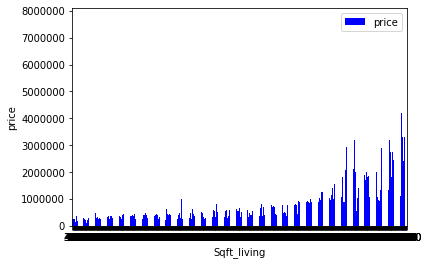

In [47]:
sqft_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sqft_living')
plt.ylabel('price')
plt.xticks(rotation=0)
plt.show()


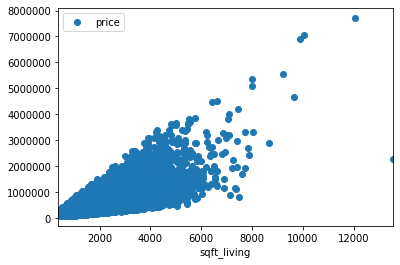

In [70]:
df1.plot(x='sqft_living', y='price',style='o')

In [67]:
df1['sqft_living'].sort_values(ascending=False)

12764    13540
7245     12050
3910     10040
9245      9890
8085      9640
         ...  
11488      420
8614       410
21316      390
860        380
15367      370
Name: sqft_living, Length: 21534, dtype: int64

In [185]:
df2 = df1[df1['sqft_living'] < 8000]

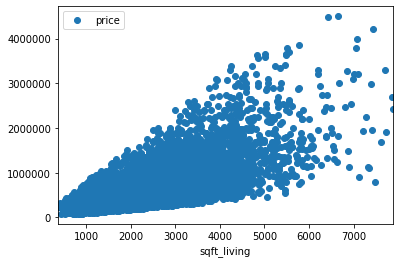

In [186]:
df2.plot(x='sqft_living', y='price',style='o')

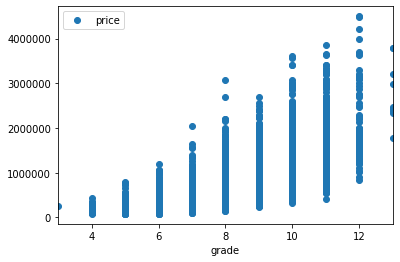

In [74]:
df2.plot(x='grade', y='price', style='o')

In [76]:
df2['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [77]:
print ("waterfront: \n")
print (df2['waterfront'].value_counts(), "\n")


waterfront: 

0.0    21382
1.0      142
Name: waterfront, dtype: int64 



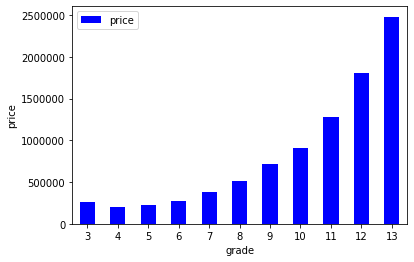

In [79]:
condition_pivot = df2.pivot_table(index='grade', values='price', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('grade')
plt.ylabel('price')
plt.xticks(rotation=0)
plt.show()

#13 is significantly higher than others

In [187]:
def encode(x):
    return 1 if x == 13 else 0

df2['enc_grade'] = df2['grade'].apply(encode)
 

In [95]:
df2

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,enc_grade
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0


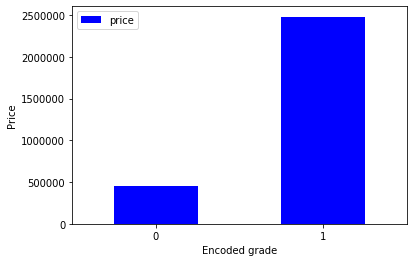

In [96]:
condition_pivot = df2.pivot_table(index='enc_grade', values='price', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded grade')
plt.ylabel('Price')
plt.xticks(rotation=0)
plt.show()

In [188]:
used_cols1 = [c for c in df2.columns.to_list() if c not in [target]]

X1 = df2[used_cols1]
y1 = df2[target]
scaler = RobustScaler()
lr = LinearRegression()
pipe1 = make_pipeline(scaler, lr)

metrics = ['r2', 'neg_mean_squared_error']
    
cv1 = cross_validate(pipe1, X1, y1, cv=3, n_jobs=-1, scoring=metrics,return_train_score=True)

In [189]:
cv1['test_r2'].mean()

0.7027535380265387

In [190]:
cv1['train_r2'].mean()

0.7086357560892281

In [191]:
df3 = df2.copy()
df3.drop(columns=['sqft_above','sqft_basement'],inplace=True)


In [192]:
used_cols2 = [c for c in df3.columns.to_list() if c not in [target]]

X2 = df3[used_cols2]
y2 = df3[target]
scaler = RobustScaler()
lr = LinearRegression()
pipe2 = make_pipeline(scaler, lr)

metrics = ['r2', 'neg_mean_squared_error']
    
cv2 = cross_validate(pipe2, X2, y2, cv=3, n_jobs=-1, scoring=metrics,return_train_score=True)

In [193]:
cv2['test_r2'].mean()

0.7025401330629494

In [194]:
cv2['train_r2'].mean()

0.70814296250503

In [50]:
# df['bathrooms'].describe()

In [51]:
# df['bathrooms'].unique()

In [52]:
# df['bathrooms'].value_counts()

## Tranforming Data

In [195]:
from sklearn.preprocessing import quantile_transform, QuantileTransformer
from sklearn.compose import TransformedTargetRegressor

In [196]:

X_transformed = pd.DataFrame(quantile_transform(X1, n_quantiles=20, # see... binning again! 
                                                output_distribution='normal', 
                                                random_state=42), 
                             columns=used_cols1)

X_transformed.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,enc_grade
0,0.607335,-0.336038,-1.252120,-1.101506,-0.513412,-5.199338,-5.199338,-5.199338,-0.406724,-0.479506,-0.704369,-5.199338,-0.554923,-5.199338,1.642538,-0.445052,-0.085338,-1.030514,-0.512696,-5.199338
1,0.446100,-0.336038,0.066012,0.690751,-0.118923,0.804596,-5.199338,-5.199338,-0.406724,-0.479506,0.641338,0.490922,-0.699547,3.226360,0.855373,1.188697,-0.591201,-0.249943,0.003288,-5.199338
2,0.334556,-1.412188,-1.252120,-1.795367,0.556125,-5.199338,-5.199338,-5.199338,-0.406724,-1.412188,-1.717274,-5.199338,-1.127221,-5.199338,-0.835371,1.427873,0.007157,1.066239,0.160742,-5.199338
3,-0.523515,0.716498,1.252120,0.054978,-0.704369,-5.199338,-5.199338,-5.199338,5.199338,-0.479506,-1.030806,1.178502,-0.253347,-5.199338,1.047787,-0.389392,-1.646198,-0.976236,-0.734487,-5.199338
4,-0.745040,-0.336038,-0.132313,-0.294441,0.129840,-5.199338,-5.199338,-5.199338,-0.406724,0.406724,0.150484,-5.199338,0.371149,-5.199338,0.066012,0.236126,1.083835,-0.066012,-0.049675,-5.199338


In [119]:
transformer = QuantileTransformer(n_quantiles=20, output_distribution='normal', random_state=42)
lr = LinearRegression()
pipe3 = make_pipeline(transformer, lr)
cv3 = cross_validate(pipe3, X_transformed, y1, cv=3, n_jobs=-1, scoring=metrics,return_train_score=True)


# scores = cross_val_score(pipe, X, y, cv=5, scoring='r2')
# print("R^2:", scores.mean(), "+/-", scores.std())

In [197]:
cv3['test_r2'].mean()

0.5939818022106688

## Ridge

In [198]:
lr = Ridge(alpha=0.025)

pipe4 = make_pipeline(scaler, lr)
cv4 = cross_validate(pipe4, X1 , y1, cv=3, n_jobs=-1, scoring=metrics,return_train_score=True)

test = cv4['test_r2'].mean()  
train= cv4['train_r2'].mean()  
    
print (f'test r2 is {test}')
print (f'train r2 is {train}')

test r2 is 0.7027579651438348
train r2 is 0.7086357010537601


## Lasso

In [199]:
lasso = Lasso(alpha=0.1)
pipe5 = make_pipeline(scaler, lasso)
cv5 = cross_validate(pipe5, X1 , y1, cv=3, n_jobs=-1, scoring=metrics,return_train_score=True)

test = cv5['test_r2'].mean()  
train= cv5['train_r2'].mean()  
    
print (f'test r2 is {test}')
print (f'train r2 is {train}')

test r2 is 0.7027537669202184
train r2 is 0.7086357558586581


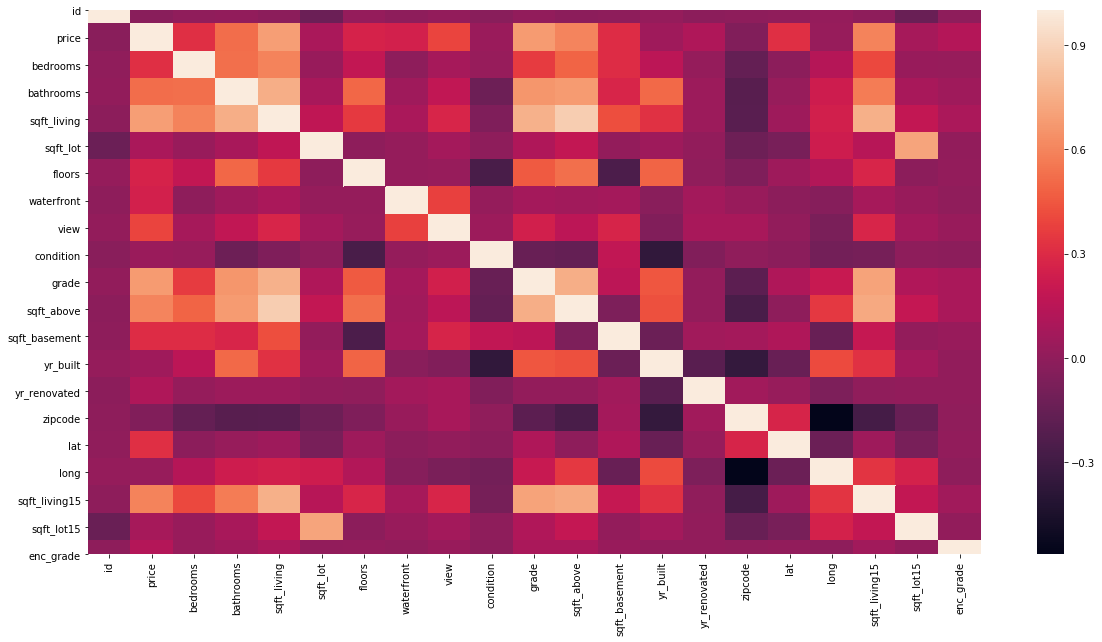

In [200]:
plt.figure(figsize = (20,10))
sns.heatmap(df2.corr())

In [201]:
# best first pass approach to dealing with multicolinearity:

df3['sqft_liv_bathrooms'] = 0.5*df3['sqft_living'] + 0.5*df3['bathrooms']


In [202]:
df3.drop(columns=['sqft_living','bathrooms'],inplace=True)

In [203]:
used_cols2 = [c for c in df3.columns.to_list() if c not in [target]]

X2 = df3[used_cols2]
y2 = df3[target]
scaler = RobustScaler()
lr = LinearRegression()
pipe2 = make_pipeline(scaler, lr)
    
cv2 = cross_validate(pipe2, X2, y2, cv=3, n_jobs=-1, scoring=metrics,return_train_score=True)

test = cv2['test_r2'].mean()  
train= cv2['train_r2'].mean()  
    
print (f'test r2 is {test}')
print (f'train r2 is {train}')

test r2 is 0.7006279459239124
train r2 is 0.7061428828997913


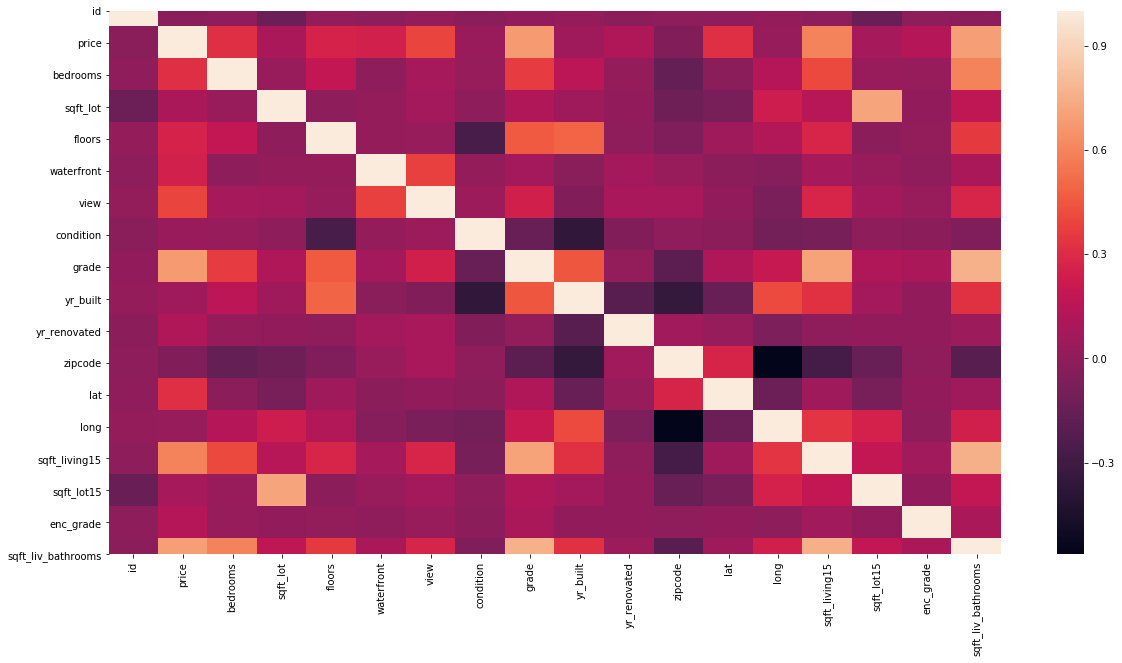

In [152]:
plt.figure(figsize = (20,10))
sns.heatmap(df3.corr())

In [204]:
used_cols2 = [c for c in df3.columns.to_list() if c not in [target]]

X2 = df3[used_cols2]
y2 = df3[target]
lr = Ridge(alpha=0.025)

pipe5 = make_pipeline(scaler, lr)
cv5 = cross_validate(pipe5, X2 , y2, cv=3, n_jobs=-1, scoring=metrics,return_train_score=True)

test = cv5['test_r2'].mean()  
train= cv5['train_r2'].mean()  
    
print (f'test r2 is {test}')
print (f'train r2 is {train}')

test r2 is 0.7006323757928783
train r2 is 0.70614282730554


In [205]:
df3['sqft_liv_bathrooms_liv15'] = 0.5*df3['sqft_liv_bathrooms'] + 0.5*df3['sqft_living15']

In [206]:
df3.drop(columns=['sqft_liv_bathrooms','sqft_liv_bathrooms'],inplace=True)

In [207]:
used_cols2 = [c for c in df3.columns.to_list() if c not in [target]]

X2 = df3[used_cols2]
y2 = df3[target]
scaler = RobustScaler()
lr = LinearRegression()
pipe2 = make_pipeline(scaler, lr)
    
cv2 = cross_validate(pipe2, X2, y2, cv=3, n_jobs=-1, scoring=metrics,return_train_score=True)

test = cv2['test_r2'].mean()  
train= cv2['train_r2'].mean()  
    
print (f'test r2 is {test}')
print (f'train r2 is {train}')

test r2 is 0.7006279459239123
train r2 is 0.7061428828997913


In [208]:
lr = Ridge(alpha=0.025)

pipe5 = make_pipeline(scaler, lr)
cv5 = cross_validate(pipe5, X2 , y2, cv=3, n_jobs=-1, scoring=metrics,return_train_score=True)

test = cv5['test_r2'].mean()  
train= cv5['train_r2'].mean()  
    
print (f'test r2 is {test}')
print (f'train r2 is {train}')

test r2 is 0.7006324544169678
train r2 is 0.7061428274699013


In [209]:
from pygam import LinearGAM

gam = LinearGAM(n_splines=25)
gam.gridsearch(X1.values, y1.values)
gam.summary()


100% (11 of 11) |########################| Elapsed Time: 0:01:43 Time:  0:01:43


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    299.3709
Link Function:                     IdentityLink Log Likelihood:                               -531251.9618
Number of Samples:                        21524 AIC:                                          1063104.6653
                                                AICc:                                         1063113.1961
                                                GCV:                                      21433602232.0657
                                                Scale:                                    20897670586.3005
                                                Pseudo R-Squared:                                   0.8325
Feature Function                  Lam

In [218]:
df_gams = df2.copy()

df_gams['lat_and_long'] = df_gams['long'] + df_gams['lat']

In [219]:
df_gams

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,enc_grade,lat_and_long
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,-74.7458
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,-74.5980
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0,-74.4951
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,-74.8722
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,-74.4282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0,-74.6467
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0,-74.8513
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0,-74.7046
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0,-74.5345


In [220]:
used_cols_g = [c for c in df_gams.columns.to_list() if c not in [target]]

X_g = df_gams[used_cols_g]
y_g = df_gams[target]

In [221]:
gam = LinearGAM(n_splines=25)
gam.gridsearch(X_g.values, y_g.values)
gam.summary()

100% (11 of 11) |########################| Elapsed Time: 0:01:02 Time:  0:01:02


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    316.9225
Link Function:                     IdentityLink Log Likelihood:                               -530102.2098
Number of Samples:                        21524 AIC:                                          1060840.2646
                                                AICc:                                         1060849.8277
                                                GCV:                                      20349251195.1597
                                                Scale:                                     19810642052.702
                                                Pseudo R-Squared:                                   0.8414
Feature Function                  Lam

In [222]:
df_gams['lat_and_long_sq'] = df_gams['lat_and_long']**2
df_gams['lat_and_long_cubes'] = df_gams['lat_and_long']**3


In [224]:
used_cols_g = [c for c in df_gams.columns.to_list() if c not in [target]]

X_g = df_gams[used_cols_g]
y_g = df_gams[target]

In [225]:
gam = LinearGAM(n_splines=25)
gam.gridsearch(X_g.values, y_g.values)
gam.summary()

100% (11 of 11) |########################| Elapsed Time: 0:01:14 Time:  0:01:14


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     324.427
Link Function:                     IdentityLink Log Likelihood:                                 -530032.87
Number of Samples:                        21524 AIC:                                           1060716.594
                                                AICc:                                         1060726.6167
                                                GCV:                                      20296876274.6462
                                                Scale:                                    19746949907.4012
                                                Pseudo R-Squared:                                   0.8419
Feature Function                  Lam

In [226]:
df_gams['lat_sq'] = df_gams['lat']**2
df_gams['lat_cubes'] = df_gams['lat']**3
df_gams['long_sq'] = df_gams['long']**2
df_gams['long_sq'] = df_gams['long']**3

In [227]:
used_cols_g = [c for c in df_gams.columns.to_list() if c not in [target]]

X_g = df_gams[used_cols_g]
y_g = df_gams[target]

In [244]:
gam = LinearGAM(n_splines=50)
gam.gridsearch(X_g.values, y_g.values)
gam.summary()

100% (11 of 11) |########################| Elapsed Time: 0:04:41 Time:  0:04:41


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    611.5339
Link Function:                     IdentityLink Log Likelihood:                               -527526.9067
Number of Samples:                        21524 AIC:                                          1056278.8812
                                                AICc:                                         1056314.8259
                                                GCV:                                      18521400200.0472
                                                Scale:                                    17576657538.7283
                                                Pseudo R-Squared:                                   0.8612
Feature Function                  Lam

In [230]:
df_gams['zipcode'].value_counts()

98103    601
98038    586
98115    580
98052    573
98117    553
        ... 
98102    103
98010    100
98024     79
98148     57
98039     48
Name: zipcode, Length: 70, dtype: int64

In [245]:
df_zip1 = df_gams.loc[df_gams['zipcode']==98103]

In [246]:
df_zip1

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,enc_grade,lat_and_long,lat_and_long_sq,lat_and_long_cubes,lat_sq,lat_cubes,long_sq
17,6865200140,485000.0,4,1.00,1600,4300,1.5,0.0,0.0,4,7,1600,0.0,1916,0.0,98103,47.6648,-122.343,1610,4300,0,-74.6782,5576.833555,-416467.891605,2271.933159,108291.239639,-1.831207e+06
111,3362400511,570000.0,3,1.75,1260,3328,1.0,0.0,0.0,5,6,700,560.0,1905,0.0,98103,47.6823,-122.349,1380,3536,0,-74.6667,5575.116089,-416275.520474,2273.601733,108410.559927,-1.831476e+06
116,3362400431,518500.0,3,3.50,1590,1102,3.0,0.0,0.0,3,8,1590,0.0,2010,0.0,98103,47.6824,-122.347,1620,3166,0,-74.6646,5574.802493,-416240.398231,2273.611270,108411.242009,-1.831386e+06
128,2331300505,822500.0,5,3.50,2320,4960,2.0,0.0,0.0,5,7,1720,600.0,1926,0.0,98103,47.6763,-122.352,1700,4960,0,-74.6757,5576.460170,-416426.066753,2273.029582,108369.640246,-1.831611e+06
149,1994200024,511000.0,3,1.00,1430,3455,1.0,0.0,0.0,3,7,980,450.0,1947,0.0,98103,47.6873,-122.336,1450,4599,0,-74.6487,5572.428412,-415974.536776,2274.078581,108444.667530,-1.830892e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21551,9521100031,690000.0,3,3.25,1540,1428,3.0,0.0,0.0,3,9,1540,0.0,2013,0.0,98103,47.6648,-122.353,1660,3300,0,-74.6882,5578.327219,-416635.219016,2271.933159,108291.239639,-1.831656e+06
21558,1931300090,610950.0,3,3.00,1680,1570,3.0,0.0,0.0,3,8,1680,0.0,2014,0.0,98103,47.6572,-122.346,1640,4800,0,-74.6888,5578.416845,-416645.260086,2271.208712,108239.447822,-1.831341e+06
21576,1931300412,475000.0,3,2.25,1190,1200,3.0,0.0,0.0,3,8,1190,0.0,2008,0.0,98103,47.6542,-122.346,1180,1224,0,-74.6918,5578.864987,-416695.467854,2270.922778,108219.008230,-1.831341e+06
21579,1972201967,520000.0,2,2.25,1530,981,3.0,0.0,0.0,3,8,1480,50.0,2006,0.0,98103,47.6533,-122.346,1530,1282,0,-74.6927,5578.999433,-416710.530971,2270.837001,108212.876855,-1.831341e+06


In [247]:
used_cols_zip = [c for c in df_zip1.columns.to_list() if c not in [target]]

X_zip = df_zip1[used_cols_zip]
y_zip = df_zip1[target]

In [248]:
gam = LinearGAM(n_splines=50)
gam.gridsearch(X_zip.values, y_zip.values)
gam.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:54 Time:  0:00:54


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    150.5901
Link Function:                     IdentityLink Log Likelihood:                                 -14353.925
Number of Samples:                          601 AIC:                                            29011.0303
                                                AICc:                                           29114.1999
                                                GCV:                                      16722677687.1775
                                                Scale:                                     9404587822.9945
                                                Pseudo R-Squared:                                   0.8391
Feature Function                  Lam

In [249]:
df_zip2 = df_gams.loc[df_gams['zipcode']==98039]

In [250]:
used_cols_zip2 = [c for c in df_zip2.columns.to_list() if c not in [target]]

X_zip2 = df_zip2[used_cols_zip2]
y_zip2 = df_zip2[target]

In [251]:
gam = LinearGAM(n_splines=50)
gam.gridsearch(X_zip2.values, y_zip2.values)
gam.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:35 Time:  0:00:35


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     46.9802
Link Function:                     IdentityLink Log Likelihood:                                 -1073.8612
Number of Samples:                           48 AIC:                                             2243.6829
                                                AICc:                                           -2551.4164
                                                GCV:                                        321560897.6775
                                                Scale:                                     2074883107.1117
                                                Pseudo R-Squared:                                   0.9999
Feature Function                  Lam

In [252]:
df_zip3 = df_gams.loc[df_gams['zipcode']==98102]

In [253]:
used_cols_zip3 = [c for c in df_zip3.columns.to_list() if c not in [target]]

X_zip3 = df_zip3[used_cols_zip3]
y_zip3 = df_zip3[target]

In [255]:
gam = LinearGAM(n_splines=50)
gam.gridsearch(X_zip3.values, y_zip3.values)
gam.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:37 Time:  0:00:37


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     97.4913
Link Function:                     IdentityLink Log Likelihood:                                 -2160.7503
Number of Samples:                          103 AIC:                                             4518.4831
                                                AICc:                                            10103.997
                                                GCV:                                        260449552.7503
                                                Scale:                                      514763681.0202
                                                Pseudo R-Squared:                                   0.9998
Feature Function                  Lam

In [57]:
# cv1['train_r2'].mean()

In [58]:
# ridge = Ridge(alpha=0.5)
# pipe4 = make_pipeline(scaler, ridge)

# cv3 = cross_validate(pipe4, X, y, cv=3, n_jobs=-1, scoring=metrics,return_train_score=True)

In [59]:
# cv3['test_r2'].mean()

In [60]:
# cv3['train_r2'].mean()